# Lyrics-Inducer
Is a NLP application used to create/complete the lyrics of a word given as the input, using LSTM in it on Tensorflow.

### 1. Aim: 
The aim is to create a lyrics inducer for any word given as the input and output should be a set of words forming some lyrics of song. 

### 2. Setup

In [ ]:
#importing the necessary libraries required
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

###  3.1 Import Dataset
Our dataset is in (.txt) format, hence we'll load our file and will display the sample lyrics.

Songs included:

1. bad guy
2. the box
3. shape of you
4. all of me
5. failing 
6. mine bazzi
7. heavy
8. hot girl bummer
9. the take
10. myself
11. skechers
12. do re mi
13. moonlight
14. blinding lights
15. goosebumps
16. chal-bombay
17. rockstar
18. starboy
19. cradles
20. roxanne



In [18]:
lyric=open('dataset.txt').read()
lyric[:2000]
#OUTPUT EXAMPLE
# I\'ll give you all my love\nIf you treat me right, baby, I\'ll give you everything\nTalk to me,
# I need to hear you need me like I need you\nFall for me, I wanna know you feel how I feel for you,

'\ufeffWhite shirt now red, my bloody nose\nSleepin\', you\'re on your tippy toes\nCreepin\' around like no one knows\nThink you\'re so criminal\nBruises on both my knees for you\nDon\'t say thank you or please\nI do what I want when I\'m wanting to\nMy soul? So cynical\nSo you\'re a tough guy\nLike it really rough guy\nJust can\'t get enough guy\nChest always so puffed guy\nI\'m that bad type\nMake your mama sad type\nMake your girlfriend mad tight\nMight seduce your dad type\nI\'m the bad guy, duh\nI\'m the bad guy\nI like it when you take control\nEven if you know that you don\'t\nOwn me, I\'ll let you play the role\nI\'ll be your animal\nMy mommy likes to sing along with me\nBut she won\'t sing this song\nIf she reads all the lyrics\nShe\'ll pity the men I know\nSo you\'re a tough guy\nLike it really rough guy\nJust can\'t get enough guy\nChest always so puffed guy\nI\'m that bad type\nMake your mama sad type\nMake your girlfriend mad tight\nMight seduce your dad type\nI\'m the bad

### 3.2 Preprocessing 


#### Converting to lowercase 
Since the words carries capital letters as well, changing it to lowercase.
Also keeoing dataset as per line would be more apt as it'll learn from the sentences formed to yield better performance

In [19]:
#lowercase and split the datset
corpus=lyric.lower().split('\n')
for i in range(40,60):
    print(corpus[i])

i mean, i don't see what she sees
but maybe it's 'cause i'm wearing your cologne
i'm a bad guy
i'm, i'm a bad guy
bad guy, bad guy
i'm a bad
pullin' out the coupe at the lot
told 'em "fuck 12, fuck swat"
bustin' all the bales out the box
i just hit a lick with the box
had to put the stick in a box, mm
pour up the whole damn seal, i'ma get lazy
i got the mojo-deals, we been trappin' like the '80's
she sucked a nigga soul, gotta cash app
told 'em wipe a nigga nose, say slatt, slatt
i won't never sell my soul, and i can back that
and i really wanna know, where you at, at?
i was out back, where the stash at
cruise the city in a bulletproof cadillac (skrrt)
'cause i know these niggas after where the bag at


#### Tokenizing 
Tokenizer creates the token for each line present in the corpus and measuring the number of the tokens created

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
total_words

1230

#### Creating Sequences
create input sequences using list of tokens. Here we are generating tokens for each word and its preceeding word for each line. i.e: 

_come closer, i'll give you_    

will become: 

[[come],[come,closer],[come,closer,i'll],[come,closer,i'll,give]] 

In [0]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [22]:
for i in range(20):
    print(input_sequences[i])

[609, 610]
[609, 610, 64]
[609, 610, 64, 451]
[609, 610, 64, 451, 5]
[609, 610, 64, 451, 5, 611]
[609, 610, 64, 451, 5, 611, 274]
[612, 37]
[612, 37, 9]
[612, 37, 9, 10]
[612, 37, 9, 10, 613]
[612, 37, 9, 10, 613, 614]
[615, 72]
[615, 72, 14]
[615, 72, 14, 33]
[615, 72, 14, 33, 80]
[615, 72, 14, 33, 80, 616]
[178, 37]
[178, 37, 19]
[178, 37, 19, 617]
[618, 9]


#### Padding
Since the length of the arrays formed is different hence padding of length of the longest array is required in order to make the array length uniform.

We can either do pre-padding or post-padding

In [23]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(max_sequence_len)
print(input_sequences)

14
[[   0    0    0 ...    0  609  610]
 [   0    0    0 ...  609  610   64]
 [   0    0    0 ...  610   64  451]
 ...
 [   0    0    0 ...    3 1228    4]
 [   0    0    0 ... 1228    4  608]
 [   0    0    0 ...    4  608 1229]]


### 4. Building Model
As we've formed our data into array form, now we can build a model to process the same.


In [24]:
model = Sequential()
model.add(Embedding(1230, 160, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1230/2, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1230, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 13, 160)           196800    
_________________________________________________________________
bidirectional (Bidirectional (None, 13, 400)           577600    
_________________________________________________________________
dropout (Dropout)            (None, 13, 400)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense (Dense)                (None, 615)               62115     
_________________________________________________________________
dense_1 (Dense)              (None, 1230)              757680    
Total params: 1,794,595
Trainable params: 1,794,595
Non-trainable params: 0
____________________________________________

In [0]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

### 5. Training the Model
Since in this case we don't have any validation set, we don't have to worry about the overfitting of model.

In [26]:
 history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
193/193 [==============================] - 26s 135ms/step - loss: 6.2133 - accuracy: 0.0291
Epoch 2/50
193/193 [==============================] - 26s 134ms/step - loss: 5.6922 - accuracy: 0.0365
Epoch 3/50
193/193 [==============================] - 26s 133ms/step - loss: 5.4338 - accuracy: 0.0419
Epoch 4/50
193/193 [==============================] - 26s 135ms/step - loss: 5.2030 - accuracy: 0.0499
Epoch 5/50
193/193 [==============================] - 26s 132ms/step - loss: 4.9828 - accuracy: 0.0560
Epoch 6/50
193/193 [==============================] - 26s 132ms/step - loss: 4.7931 - accuracy: 0.0716
Epoch 7/50
193/193 [==============================] - 26s 132ms/step - loss: 4.6083 - accuracy: 0.0908
Epoch 8/50
193/193 [==============================] - 26s 134ms/step - loss: 4.4190 - accuracy: 0.1145
Epoch 9/50
193/193 [==============================] - 30s 154ms/step - loss: 4.2281 - accuracy: 0.1361
Epoch 10/50
193/193 [==============================] - 26s 133ms/step - l

### 6. Analysing the results
By plotting the Training accuraccy and Training loss using matplot-lib, we can infer the model performance

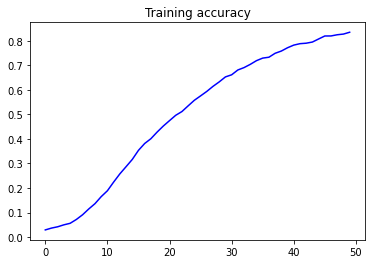

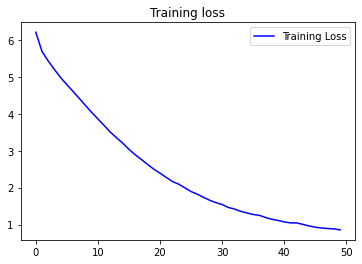

In [27]:

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()


As we can see that the accuracy has almost reached 82% by 50 epochs and may cross 90% on increasing the number of epochs, and the training loss has reduced down to 0.95 which confirms that the model has performed really well

### 7. Testing the model

Take the input from user, converting into padded array and printing results

In [0]:
next_words = 100
seed_text = "my last made me "
  

In [29]:

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
my last made me  feel like i would never try again yeah yeah yeah yeah yeah yeah yeah oh the one that i'm calling out of my love was handmade for somebody like me baby thrifty so go bad guy anthem ta chahta hoon pow ta ta pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow


As a result we can see the induced lyrics  from line one, completes the sentence of FAILING and the next one is carried out to the song GOOSEBUMPS. 
And after that the perdiction made was of a single word as the corous distorted the prediction. 

In [35]:
next_words = 50
seed_text = "chal bombay meri"

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)
  

chal bombay meri maa se milata hoon tujhe toe se nibhata hoon pow pow pow pow pow pow pow pow haath se khilata hoon pow ta ta pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow pow


In [31]:
# trying random samples:

next_words = 50
seed_text = "they say"

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)
  

they say where my whole arm in the pool horse ah lookin' the ride yeah i fill up on a taxi to just just gon' drive me mad much fuck you and you baby you love sticking and my girl baby i love you love you and you to a mood baby


And the results are pretty much good ;)

### 8. Saving the Model

In [0]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [0]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

### 9. Loading the trained model (if needed)

In [ ]:
# !pip install h5py
# import tensorflow as tf
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [40]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 13, 160)           196800    
_________________________________________________________________
bidirectional (Bidirectional (None, 13, 400)           577600    
_________________________________________________________________
dropout (Dropout)            (None, 13, 400)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense (Dense)                (None, 615)               62115     
_________________________________________________________________
dense_1 (Dense)              (None, 1230)              757680    
Total params: 1,794,595
Trainable params: 1,794,595
Non-trainable params: 0
____________________________________________

### 10. Conclusion 
Hence, we can say that we sucessfully built the Lyrics-Inducer using NLP and LSTM, the model is more like predicting the NEXT WORD according to previous set of words, hence not much accurate for predicting longer sentences. 
And there are plenty of applications possible using the LSTM and NLP, do try.